In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from dmba import classificationSummary

In [2]:
# The company is in loss and are trying to improve their performance. So they are planning to increase their profit by reducing the transportation and manufacturing costs.
#Also developed a linear programming problem model to find these optimal values so that they can maximize their profit.

In [3]:
shipping_df = pd.read_csv('supply_chain_data.csv')

In [4]:
shipping_df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [5]:
shipping_df.isna().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [6]:
shipping_df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [7]:
# Specify the columns to be dropped
columns_to_drop = ['SKU', 'Customer demographics']

# Drop the specified columns
df = shipping_df.drop(columns_to_drop, axis=1)

# Print the updated DataFrame
print(df)

   Product type      Price  Availability  Number of products sold  \
0      haircare  69.808006            55                      802   
1      skincare  14.843523            95                      736   
2      haircare  11.319683            34                        8   
3      skincare  61.163343            68                       83   
4      skincare   4.805496            26                      871   
..          ...        ...           ...                      ...   
95     haircare  77.903927            65                      672   
96    cosmetics  24.423131            29                      324   
97     haircare   3.526111            56                       62   
98     skincare  19.754605            43                      913   
99     haircare  68.517833            17                      627   

    Revenue generated  Stock levels  Lead times  Order quantities  \
0         8661.996792            58           7                96   
1         7460.900065            

In [64]:
df['Profit'] = (df['Price'] - (df['Manufacturing costs'] - df['Shipping costs']-df['Costs'] ))

# Print the updated DataFrame
print(df)

   Product type      Price  Availability  Number of products sold  \
0      haircare  69.808006            55                      802   
1      skincare  14.843523            95                      736   
2      haircare  11.319683            34                        8   
3      skincare  61.163343            68                       83   
4      skincare   4.805496            26                      871   
..          ...        ...           ...                      ...   
95     haircare  77.903927            65                      672   
96    cosmetics  24.423131            29                      324   
97     haircare   3.526111            56                       62   
98     skincare  19.754605            43                      913   
99     haircare  68.517833            17                      627   

    Revenue generated  Stock levels  Lead times  Order quantities  \
0         8661.996792            58           7                96   
1         7460.900065            

In [65]:
# Group the data by product type and calculate the total profit for each group
profit_by_product_type = df.groupby('Product type')['Profit'].sum()

# Sort the profit in descending order
sorted_profit = profit_by_product_type.sort_values(ascending=False)

# Print the product types with their corresponding profit
for product_type, profit in sorted_profit.items():
    print(f"Product type: {product_type}, Profit: {profit}")

Product type: skincare, Profit: 22356.352438021393
Product type: haircare, Profit: 17446.640304888933
Product type: cosmetics, Profit: 13895.977190423122


In [66]:
# Group the data by 'Product type' and calculate the sum of 'Profit' for each group
profit_by_product_type = df.groupby('Product type')['Profit'].sum()

# Find the product type with the maximum profit
max_profit_product_type = profit_by_product_type.idxmax()

# Print the product type with the maximum profit
print("Product type with maximum profit:", max_profit_product_type)

Product type with maximum profit: skincare


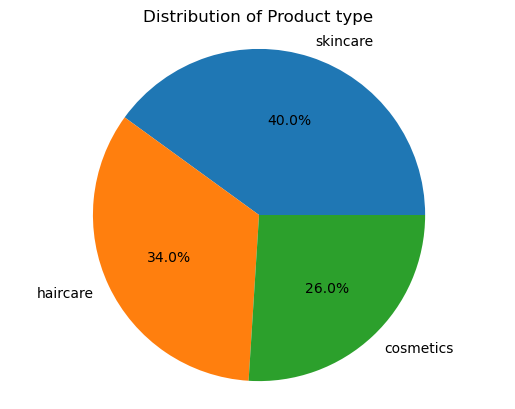

In [67]:
Type = df['Product type'].value_counts()
plt.pie(Type, labels=Type.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Product type')
plt.show()

In [68]:
# The company is producing skincare products more than other two. This may be the reason they are getting more profits from skincare.

In [69]:
df1 = df.groupby(['Product type'])
df1['Price'].median()

Product type
cosmetics    64.311917
haircare     48.588874
skincare     37.228419
Name: Price, dtype: float64

In [70]:
df1 = df.groupby(['Shipping carriers'])
df1['Shipping costs'].median()

Shipping carriers
Carrier A    5.126010
Carrier B    5.773264
Carrier C    5.352878
Name: Shipping costs, dtype: float64

In [71]:
#Shipping carrier A has comparitively lower cost other than other two.So they can use carrier A for most of the possible shipping.

In [72]:
df1 = df.groupby(['Location'])
df1['Transportation modes'].value_counts()

Location   Transportation modes
Bangalore  Road                     8
           Rail                     5
           Air                      3
           Sea                      2
Chennai    Air                      6
           Rail                     5
           Road                     5
           Sea                      4
Delhi      Rail                     8
           Air                      4
           Sea                      2
           Road                     1
Kolkata    Road                    10
           Air                      6
           Rail                     6
           Sea                      3
Mumbai     Air                      7
           Sea                      6
           Road                     5
           Rail                     4
Name: Transportation modes, dtype: int64

In [73]:
grouped_df = df.groupby(['Location', 'Transportation modes'])['Costs'].median()

# Print the grouped and median values
print(grouped_df)

Location   Transportation modes
Bangalore  Air                     758.724773
           Rail                    677.944570
           Road                    591.449063
           Sea                     407.573989
Chennai    Air                     597.147653
           Rail                    609.379207
           Road                    510.358000
           Sea                     579.517573
Delhi      Air                     760.981463
           Rail                    489.219944
           Road                    110.364335
           Sea                     438.216700
Kolkata    Air                     260.118740
           Rail                    386.138067
           Road                    763.054643
           Sea                     183.932968
Mumbai     Air                     602.898499
           Rail                    347.211993
           Road                    503.065579
           Sea                     322.219360
Name: Costs, dtype: float64


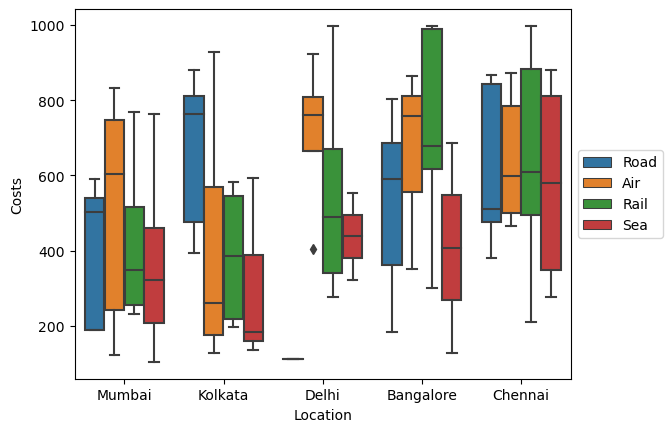

In [74]:
#https://stackoverflow.com/questions/57540200/how-to-construct-a-side-by-side-boxplot-for-a-pandas-dataframe
import seaborn as sns
ax = sns.boxplot(y='Costs', x='Location', data=df, hue='Transportation modes')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [75]:
#From the above graphs and analysis we can observe that in bangalore, the mode used widely is road but sea is more cheaper. Also 
#in chennai, the cheaper mode is road but widely used is air.So in non urgent cases road can be used to reduce the cost.
#In Delhi Road is less expensive than other modes, so it can be used for most of the cases.In Kolkata,Road mode is highly expensive as compared to the other three and it is commonly used.
#In Mumbai,Air is most commonly used which is expensive than other modes of transportation.

In [76]:
grouped_df = df.groupby(['Location', 'Routes'])['Costs'].median()

# Print the grouped and median values
print(grouped_df)

Location   Routes 
Bangalore  Route A    682.971018
           Route B    612.592788
           Route C    351.504219
Chennai    Route A    659.414771
           Route B    510.358000
           Route C    609.379207
Delhi      Route A    482.191239
           Route B    496.248650
           Route C    553.420471
Kolkata    Route A    254.776159
           Route B    764.935376
           Route C    555.859104
Mumbai     Route A    347.211993
           Route B    504.311357
           Route C    322.219360
Name: Costs, dtype: float64


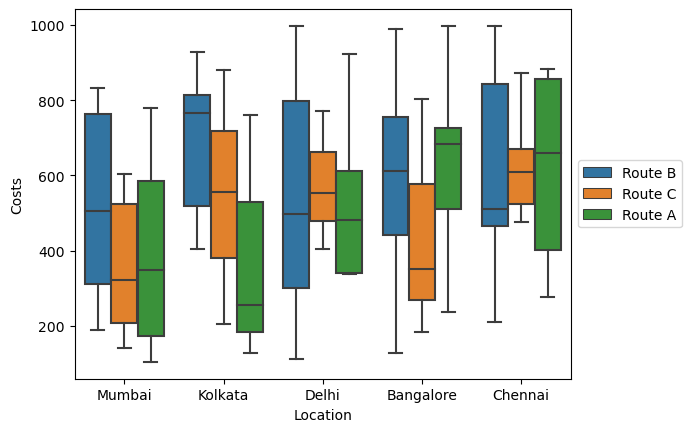

In [77]:
#https://stackoverflow.com/questions/57540200/how-to-construct-a-side-by-side-boxplot-for-a-pandas-dataframe
import seaborn as sns
ax = sns.boxplot(y='Costs', x='Location', data=df, hue='Routes')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

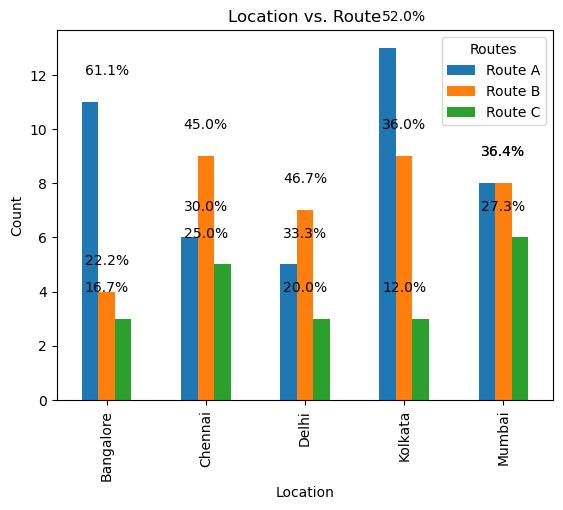

In [78]:
#(“Display Percentage above Bar Chart in Matplotlib,” 2021)
route_counts = df.groupby(['Location', 'Routes']).size().unstack()

# the total count for each warehouse block
total_counts = route_counts.sum(axis=1)

# the percentage for each bar
percentages = route_counts.divide(total_counts, axis=0) * 100

# Ploting the bar chart
ax = route_counts.plot(kind='bar')

# Adding percentage labels to each bar
for i in range(len(route_counts)):
    for j in range(len(route_counts.columns)):
        value = route_counts.iloc[i, j]
        percentage = percentages.iloc[i, j]
        ax.text(i, value + 1, f'{percentage:.1f}%', ha='center')

# labels and title
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Location vs. Route')


plt.show()

In [79]:
#In Bangalore Route c can be more frequently used to reduce the cost as well in Mumbai,instaed of B, C can be used more often.

In [80]:
from pulp import *

# Define the products and their respective manufacturing costs and shipping costs
products = df['Product type'].unique()
manufacturing_cost = df.groupby('Product type')['Manufacturing costs'].first().to_dict()
shipping_cost = df.groupby('Product type')['Shipping costs'].first().to_dict()

# Create the problem
problem = LpProblem("Product Allocation Problem", LpMaximize)

# Define the decision variables
allocation = LpVariable.dicts("Allocation", products, lowBound=0, cat='Continuous')
manufacturing_cost_variable = LpVariable.dicts("ManufacturingCost", products, lowBound=0, cat='Continuous')
shipping_cost_variable = LpVariable.dicts("ShippingCost", products, lowBound=0, cat='Continuous')
total_manufacturing_cost = LpVariable.dicts("TotalManufacturingCost", products, lowBound=0, cat='Continuous')
auxiliary_variable = LpVariable.dicts("Auxiliary", products, lowBound=0, cat='Continuous')

# Set the objective function
profit = df.groupby('Product type')['Profit'].first().to_dict()
shipping_cost = df.groupby('Product type')['Shipping costs'].first().to_dict()
objective = lpSum([profit[p] * allocation[p] for p in products]) - lpSum([shipping_cost[p] * allocation[p] for p in products])
problem += objective

# Set the constraints
for p in products:
    problem += allocation[p] <= df.loc[df['Product type'] == p, 'Availability'].values[0]
    problem += manufacturing_cost_variable[p] == manufacturing_cost[p]
    problem += shipping_cost_variable[p] == shipping_cost[p]
    problem += total_manufacturing_cost[p] <= df.loc[df['Product type'] == p, 'Manufacturing costs'].sum()
    problem += auxiliary_variable[p] <= manufacturing_cost_variable[p]
    problem += auxiliary_variable[p] <= allocation[p]
    problem += total_manufacturing_cost[p] >= auxiliary_variable[p]
    problem += total_manufacturing_cost[p] - auxiliary_variable[p] <= 0.001

# Solve the problem
problem.solve()

# Print the optimal allocation, manufacturing cost, shipping cost, and profit for each product
for p in products:
    print(f"Product: {p}, Optimal Allocation: {allocation[p].varValue}, Optimal Manufacturing Cost: {manufacturing_cost_variable[p].varValue}, Optimal Shipping Cost: {shipping_cost_variable[p].varValue}, Optimal Profit: {profit[p]}")


Product: haircare, Optimal Allocation: 55.0, Optimal Manufacturing Cost: 46.279879, Optimal Shipping Cost: 2.9565721, Optimal Profit: 214.23677390024216
Product: skincare, Optimal Allocation: 95.0, Optimal Manufacturing Cost: 33.616769, Optimal Shipping Cost: 9.7165748, Optimal Profit: 494.0089082424549
Product: cosmetics, Optimal Allocation: 59.0, Optimal Manufacturing Cost: 99.466109, Optimal Shipping Cost: 2.3483388, Optimal Profit: 747.8969263808373


C:\Users\anjan\anaconda3\lib\site-packages\pulp\pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [81]:
#These results represent the recommended values for each variable that maximize the profit in the given optimization problem.

#Optimal Allocation refers to the recommended number of units to allocate or produce for each product.
#Optimal Manufacturing Cost indicates the cost incurred in manufacturing each unit of the product.
#Optimal Shipping Cost represents the cost associated with shipping each unit of the product.
#Optimal Profit is the maximum profit achievable based on the optimal allocation, manufacturing cost, and shipping cost.
#By analyzing these results, you can make informed decisions about the production and allocation strategy for each product. It provides insights into the quantity to produce, the costs involved, and the expected profit.

In [82]:
from pulp import *

# Define the products and their respective manufacturing costs, shipping costs, and prices
products = df['Product type'].unique()
manufacturing_cost = df.groupby('Product type')['Manufacturing costs'].first().to_dict()
shipping_cost = df.groupby('Product type')['Shipping costs'].first().to_dict()
price = df.groupby('Product type')['Price'].first().to_dict()

# Create the problem
problem = LpProblem("Product Allocation Problem", LpMaximize)

# Define the decision variables
allocation = LpVariable.dicts("Allocation", products, lowBound=0, cat='Continuous')
manufacturing_cost_variable = LpVariable.dicts("ManufacturingCost", products, lowBound=0, cat='Continuous')
shipping_cost_variable = LpVariable.dicts("ShippingCost", products, lowBound=0, cat='Continuous')
total_manufacturing_cost = LpVariable.dicts("TotalManufacturingCost", products, lowBound=0, cat='Continuous')
auxiliary_variable = LpVariable.dicts("Auxiliary", products, lowBound=0, cat='Continuous')

# Set the objective function
profit = df.groupby('Product type')['Profit'].first().to_dict()
objective = lpSum([profit[p] * allocation[p] for p in products]) - lpSum([shipping_cost[p] * allocation[p] for p in products]) - lpSum([price[p] * allocation[p] for p in products])
problem += objective

# Set the constraints
for p in products:
    problem += allocation[p] <= df.loc[df['Product type'] == p, 'Availability'].values[0]
    problem += manufacturing_cost_variable[p] == manufacturing_cost[p]
    problem += shipping_cost_variable[p] == shipping_cost[p]
    problem += total_manufacturing_cost[p] <= df.loc[df['Product type'] == p, 'Manufacturing costs'].sum()
    problem += auxiliary_variable[p] <= manufacturing_cost_variable[p]
    problem += auxiliary_variable[p] <= allocation[p]
    problem += total_manufacturing_cost[p] >= auxiliary_variable[p]
    problem += total_manufacturing_cost[p] - auxiliary_variable[p] <= 0.001

# Solve the problem
problem.solve()

# Print the optimal allocation, manufacturing cost, shipping cost, price, and profit for each product
for p in products:
    print(f"Product: {p}, Optimal Allocation: {allocation[p].varValue}, Optimal Manufacturing Cost: {manufacturing_cost_variable[p].varValue}, Optimal Shipping Cost: {shipping_cost_variable[p].varValue}, Price: {price[p]}, Optimal Profit: {profit[p]}")


Product: haircare, Optimal Allocation: 55.0, Optimal Manufacturing Cost: 46.279879, Optimal Shipping Cost: 2.9565721, Price: 69.80800554211577, Optimal Profit: 214.23677390024216
Product: skincare, Optimal Allocation: 95.0, Optimal Manufacturing Cost: 33.616769, Optimal Shipping Cost: 9.7165748, Price: 14.84352327508434, Optimal Profit: 494.0089082424549
Product: cosmetics, Optimal Allocation: 59.0, Optimal Manufacturing Cost: 99.466109, Optimal Shipping Cost: 2.3483388, Price: 42.95838438246007, Optimal Profit: 747.8969263808373


C:\Users\anjan\anaconda3\lib\site-packages\pulp\pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [83]:
#For the "haircare" product, the optimal allocation is 55 units. The manufacturing cost for each unit is approximately 46.28, and the shipping cost is approximately 2.96. The price for each unit is 69.81, resulting in an optimal profit of 214.24.

#For the "skincare" product, the optimal allocation is 95 units. The manufacturing cost for each unit is approximately 33.62, and the shipping cost is approximately 9.72. The price for each unit is 14.84, resulting in an optimal profit of 494.01.

#For the "cosmetics" product, the optimal allocation is 59 units. The manufacturing cost for each unit is approximately 99.47, and the shipping cost is approximately 2.35. The price for each unit is 42.96, resulting in an optimal profit of 747.90.

#From these results, we can observe the following:

#The optimal allocation of units varies for each product, indicating the recommended quantity to produce or allocate.
#The manufacturing cost and shipping cost contribute to the overall cost of producing and delivering the products.
#The price per unit differs for each product, impacting the potential profit.
#The optimal profit is calculated based on the allocated units, manufacturing cost, shipping cost, and price, providing insights into the expected financial gain.
#These results suggest that the "haircare" product has a lower price per unit compared to its manufacturing and shipping costs, 
#resulting in a relatively lower profit compared to the other products. 
#On the other hand, the "skincare" product has a significantly lower price per unit, which might affect its profit margin. 
#The "cosmetics" product seems to have a higher price per unit and relatively higher profit.
# So they can invest more in cosmetics which can increase their overall profit.

#It's important to consider market demand, competition, and other factors when interpreting these results and making business decisions.

In [84]:
pip install simpy


Note: you may need to restart the kernel to use updated packages.


In [85]:
import simpy


# Define a process that represents the manufacturing and shipping of a product
def process_product(env, name, allocation):
    manufacturing_cost = df.loc[df['Product type'] == name, 'Manufacturing costs'].iloc[0]
    shipping_cost = df.loc[df['Product type'] == name, 'Shipping costs'].iloc[0]

    yield availability.get(allocation)
    
    manufacturing_cost_total = manufacturing_cost
    shipping_cost_total = shipping_cost
    profit_total = df.loc[df['Product type'] == name, 'Profit'].iloc[0] 

    print(f"Product: {name}, Optimal Allocation: {allocation}, Optimal Manufacturing Cost: {manufacturing_cost_total}, Optimal Shipping Cost: {shipping_cost_total}, Optimal Profit: {profit_total}")

# Define the simulation environment
env = simpy.Environment()

# Define the availability resource
initial_availability = df['Availability'].sum()  # Calculate the sum of availability
availability = simpy.Container(env, capacity=initial_availability, init=initial_availability)

# Define the product processes
for name in df['Product type'].unique():
    allocation = df.loc[df['Product type'] == name, 'Availability'].iloc[0]
    env.process(process_product(env, name, allocation))

# Run the simulation
env.run()


Product: haircare, Optimal Allocation: 55, Optimal Manufacturing Cost: 46.27987924050832, Optimal Shipping Cost: 2.956572139430807, Optimal Profit: 214.23677390024216
Product: skincare, Optimal Allocation: 95, Optimal Manufacturing Cost: 33.61676895373, Optimal Shipping Cost: 9.71657477143131, Optimal Profit: 494.0089082424549
Product: cosmetics, Optimal Allocation: 59, Optimal Manufacturing Cost: 99.46610860359912, Optimal Shipping Cost: 2.3483387844177805, Optimal Profit: 747.8969263808373


In [ ]:
#it suggests that the simulation model accurately represents the optimization model. 
#This is a positive outcome, as it indicates that the simulation is capturing the expected behavior and providing consistent results.
#As simulation results align with the optimized values, it indicates that the simulation model is well-designed and provides a reliable representation of the system's behavior and optimization outcomes.